## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [ ]:
your_name = "Rachana Khadka"
your_student_id = "48696382"

In [ ]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
car_sell_df = pd.read_csv('/car_sell.csv')

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [ ]:
print(car_sell_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4340 non-null   int64  
 1   name           4340 non-null   object 
 2   year           4030 non-null   float64
 3   selling_price  4340 non-null   int64  
 4   km_driven      4340 non-null   int64  
 5   fuel           4340 non-null   object 
 6   seller_type    4340 non-null   object 
 7   transmission   4340 non-null   object 
 8   owner          4340 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 305.3+ KB
None


In [ ]:
#Removing records where 'year' is missing
polished_car_sell_df = car_sell_df.dropna(subset=['year'])
#Removing records where 'fuel' is missing
polished_car_sell_df = polished_car_sell_df[polished_car_sell_df['fuel'] != 'none']


In [ ]:
#polished dataframe info:
print(polished_car_sell_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3886 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3886 non-null   int64  
 1   name           3886 non-null   object 
 2   year           3886 non-null   float64
 3   selling_price  3886 non-null   int64  
 4   km_driven      3886 non-null   int64  
 5   fuel           3886 non-null   object 
 6   seller_type    3886 non-null   object 
 7   transmission   3886 non-null   object 
 8   owner          3886 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 303.6+ KB
None


In [ ]:
print(f"/nInitial number of rows: {len(car_sell_df)}")



/nInitial number of rows: 4340


In [ ]:
print(f"/polished number of rows: {len(polished_car_sell_df)}")

/polished number of rows: 3886


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [ ]:
# Number of unique values in specific data
unique_name_count = polished_car_sell_df['name'].nunique()
unique_seller_type_count = polished_car_sell_df['seller_type'].nunique()
unique_transmission_count = polished_car_sell_df['transmission'].nunique()
unique_owner_count = polished_car_sell_df['owner'].nunique()





In [ ]:
print(f"unique car names: {unique_name_count}")


unique car names: 1402


In [ ]:
print(f"unique seller types: {unique_seller_type_count}")

unique seller types: 3


In [ ]:
print(f"unique transmission types: {unique_transmission_count}")

unique transmission types: 2


In [ ]:
print(f"unique owner types: {unique_owner_count}")

unique owner types: 5


In [ ]:
# calculating km_driven descriptive statistics
km_driven_stats = polished_car_sell_df['km_driven'].describe()

In [ ]:
#  Displaying descriptive statistics for km_diven
print("/nDescriptive statistics for 'km_driven':")
print (km_driven_stats)

/nDescriptive statistics for 'km_driven':
count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64


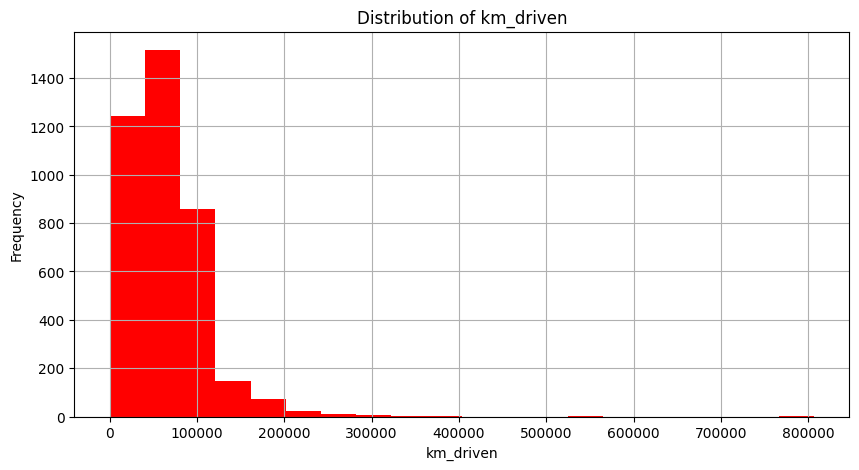

In [ ]:
# Distribution plotting of km_driven
plt.figure(figsize= (10,5))
plt.hist(polished_car_sell_df['km_driven'], bins=20, color='red')
plt.xlabel('km_driven')
plt.ylabel('Frequency')
plt.title('Distribution of km_driven')
plt.grid(True)
plt.show()


In [ ]:
#calculating number of selling_price grouped by different seller_type
selling_price_stats_by_seller_type = polished_car_sell_df.groupby('seller_type') ['selling_price'].describe()

In [ ]:
#displaying descriptive statistics
print(selling_price_stats_by_seller_type)

                   count           mean            std       min       25%  \
seller_type                                                                  
Dealer             889.0  702093.314961  813597.811832   22000.0  300000.0   
Individual        2903.0  421169.410265  420273.684129   20000.0  170000.0   
Trustmark Dealer    94.0  935797.872340  655724.299195  315000.0  625000.0   

                       50%       75%        max  
seller_type                                      
Dealer            490000.0  746000.0  8900000.0  
Individual        300000.0  540000.0  4800000.0  
Trustmark Dealer  750000.0  760000.0  2600000.0  


<Figure size 1000x500 with 0 Axes>

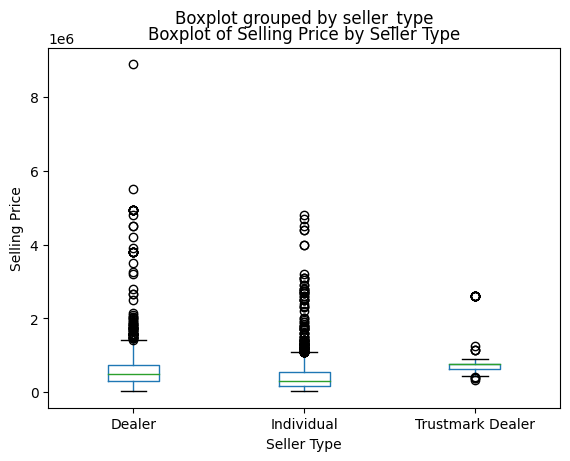

In [ ]:
# Boxplotting selling_price grouped by seller _type
plt.figure(figsize=(10,5))
polished_car_sell_df.boxplot(column='selling_price', by='seller_type', grid=False)
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Boxplot of Selling Price by Seller Type')
plt.show()

In [ ]:
# finding new column'year_old' to show the age of car
polished_car_sell_df['year_old'] = 2023 - polished_car_sell_df['year']

In [ ]:
#calculating descriptive statistics foe year_old by owner grouping
years_old_stats_by_owner = polished_car_sell_df.groupby('owner')['year_old'].describe()

## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#for correlation calculating select only numeric columns
numeric_df = polished_car_sell_df.select_dtypes(include=[np.number])

In [ ]:
#calculating the correlation matrix using only numeric columns
correlation_matrix = numeric_df.corr()

In [ ]:
# correlation matrix displaying
print(correlation_matrix)

               Unnamed: 0      year  selling_price  km_driven  year_old
Unnamed: 0       1.000000 -0.011988      -0.040288   0.032569  0.011988
year            -0.011988  1.000000       0.419222  -0.409349 -1.000000
selling_price   -0.040288  0.419222       1.000000  -0.188057 -0.419222
km_driven        0.032569 -0.409349      -0.188057   1.000000  0.409349
year_old         0.011988 -1.000000      -0.419222   0.409349  1.000000


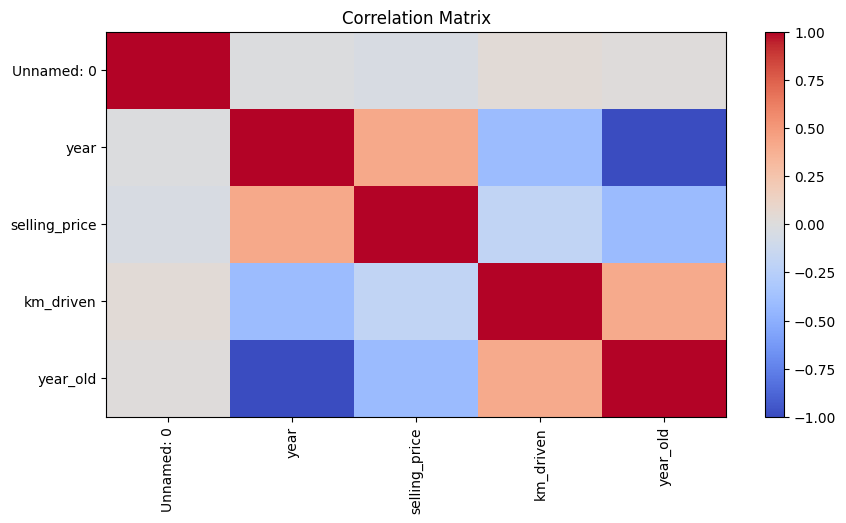

In [ ]:
#plotting the map of correlation matrix
plt.figure(figsize=(10,5))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

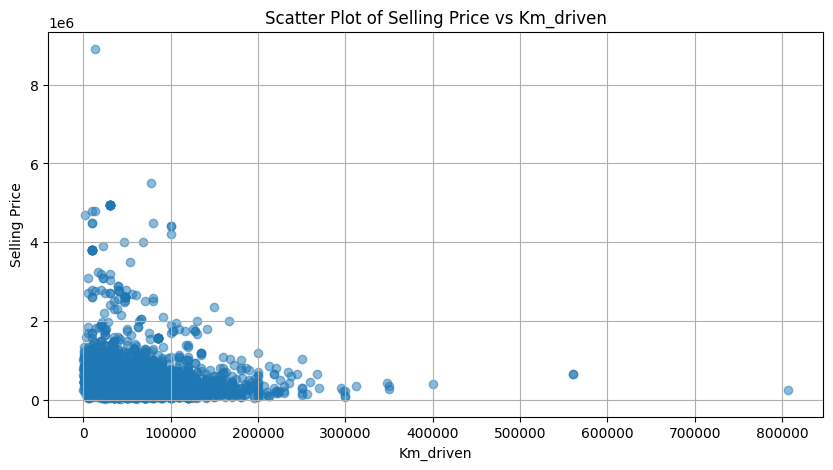

In [ ]:
#scatter plot for 'selling price' vs 'Km_driven'
plt.figure(figsize=(10,5))
plt.scatter(polished_car_sell_df['km_driven'], polished_car_sell_df['selling_price'], alpha=0.5)
plt.xlabel('Km_driven')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Selling Price vs Km_driven')
plt.grid(True)
plt.show()

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [ ]:
import numpy as np


#  prepare Data preparation

# Features (X) and target (Y)
X = polished_car_sell_df[['km_driven', 'year_old']].values
Y = polished_car_sell_df['selling_price'].values

In [ ]:
#adding  a column of ones to x for the intercept term:
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [ ]:
# calculating the normal equation using cofficients:
theta = np.linalg.inv(X.T @ X) @ X.T @ Y




In [123]:
# selling prices using model
y_pred = X @ theta

In [125]:
#calculating (MSE) AND (R2) SCORE:
MSE = np.mean((Y - y_pred) ** 2)
ss_total = np.sum((Y - np.mean(Y)) ** 2)
ss_residual = np.sum((Y - y_pred) ** 2)
R2 = 1 - (ss_residual / ss_total)

In [126]:
#model evaluation metrics
print(f"cofficients (theta): {theta}")

cofficients (theta): [ 1.05514407e+06 -2.36489913e-01 -5.47010243e+04]


In [127]:
#mean square error
print(f"Mean Squared Error: {MSE}")

Mean Squared Error: 257091622636.794


In [135]:
print(f"R^2 score: (r2)")

R^2 score: (r2)


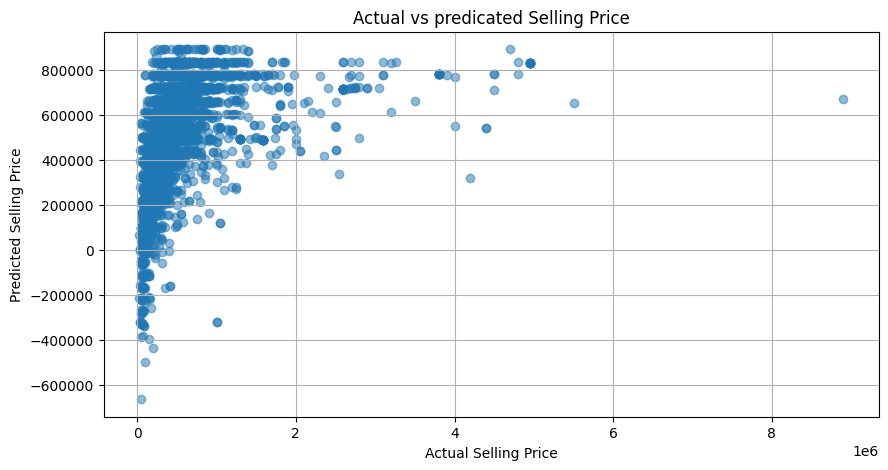

In [133]:
#scatter plot of predicated vs actual selling prices
plt.figure(figsize=(10,5))
plt.scatter(Y, y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs predicated Selling Price')
plt.grid(True)
plt.show()